In [ ]:
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")

#BiocManager::install("DESeq2")
#install.packages(c('ggplot2', 'pheatmap'))

In [1]:
library(DESeq2)

Warning message:
“package ‘DESeq2’ was built under R version 4.0.3”
Loading required package: S4Vectors

Warning message:
“package ‘S4Vectors’ was built under R version 4.0.3”
Loading required package: stats4

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rown

In [2]:
download.file('https://adameykolab.srv.meduniwien.ac.at/share/teaching/bulkRNAseq/counts.tab', 'counts.tab')

In [3]:
metadata = data.frame(
  treatment = c("wt", "ko", "ko", "ko", "wt", "wt")
)
rownames(metadata) = c('SRR3051646','SRR3051644','SRR3051645','SRR3051643','SRR3051647','SRR3051648')
metadata

,treatment
,<chr>
SRR3051646,wt
SRR3051644,ko
SRR3051645,ko
SRR3051643,ko
SRR3051647,wt
SRR3051648,wt


In [4]:
M = read.table('counts.tab', header = F, row.names = 1)
colnames(M) = rownames(metadata)
head(M)

,SRR3051646,SRR3051644,SRR3051645,SRR3051643,SRR3051647,SRR3051648
,<int>,<int>,<int>,<int>,<int>,<int>
0610005C13Rik,7,7,6,8,14,7
0610006L08Rik,0,0,0,0,0,0
0610009B22Rik,47,60,68,62,59,50
0610009O20Rik,182,253,239,217,205,176
0610010F05Rik,96,58,61,46,70,44
0610010K14Rik,0,0,0,0,0,0


# Create a new DESeq2 object

We will need thre things:

1. Gene expression matrix (raw counts), n_genes x n_samples
2. Metadata data frame, n_samples x n_metada_columns, rownames correspond to colnames of the count matrix
3. Design (formula), what metadata variable is used for the comparison

In [5]:
#removing entries starting with __ (e.g. total coverage)
M_only_genes = M[!startsWith(rownames(M), '__'),]

DE = DESeqDataSetFromMatrix(countData = M_only_genes,
                              colData = metadata,
                              design = ~ treatment)
DE

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


class: DESeqDataSet 
dim: 31017 6 
metadata(1): version
assays(1): counts
rownames(31017): 0610005C13Rik 0610006L08Rik ... mt-Nd5 mt-Nd6
rowData names(0):
colnames(6): SRR3051646 SRR3051644 ... SRR3051647 SRR3051648
colData names(1): treatment

# Run DESeq2 test

In [6]:
DE = DESeq(DE)


estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



# Fetch results, select significant genes

In [7]:
res = results(DE)
res

log2 fold change (MLE): treatment wt vs ko 
Wald test p-value: treatment wt vs ko 
DataFrame with 31017 rows and 6 columns
                 baseMean log2FoldChange     lfcSE      stat      pvalue
                <numeric>      <numeric> <numeric> <numeric>   <numeric>
0610005C13Rik     8.25752      0.6416088  0.783796  0.818592    0.413019
0610006L08Rik     0.00000             NA        NA        NA          NA
0610009B22Rik    56.92703     -0.0493366  0.305380 -0.161558    0.871654
0610009O20Rik   208.52870     -0.0928462  0.172797 -0.537313    0.591052
0610010F05Rik    62.58281      0.5947624  0.328736  1.809238    0.070414
...                   ...            ...       ...       ...         ...
mt-Nd3          39.010743      -1.208023  0.530464 -2.277296 2.27686e-02
mt-Nd4        3109.231438      -0.370868  0.124130 -2.987746 2.81043e-03
mt-Nd4l          0.816194      -0.343038  2.649412 -0.129477 8.96980e-01
mt-Nd5        5060.035583      -0.545963  0.122584 -4.453791 8.43672e-06
m

In [13]:
M[c('Tet1', 'Bcl2'),]

,SRR3051646,SRR3051644,SRR3051645,SRR3051643,SRR3051647,SRR3051648
,<int>,<int>,<int>,<int>,<int>,<int>
Tet1,440,60,60,53,424,323
Bcl2,7,2,6,1,7,2


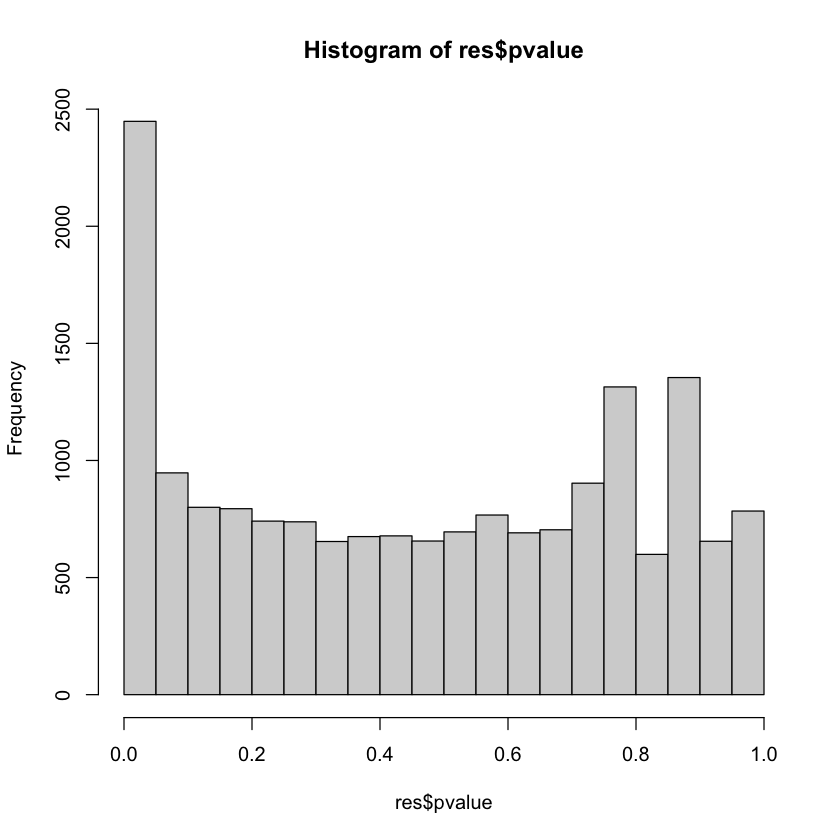

In [8]:
hist(res$pvalue)

In [8]:
res_significant = res[!is.na(res$padj) & res$padj<0.05,]

res_significant[order(res_significant$padj),]

log2 fold change (MLE): treatment wt vs ko 
Wald test p-value: treatment wt vs ko 
DataFrame with 974 rows and 6 columns
         baseMean log2FoldChange     lfcSE      stat      pvalue        padj
        <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
Afp       716.617        2.07238  0.119788   17.3004 4.67263e-67 5.16232e-63
Gm26917   487.232       -2.39026  0.150641  -15.8672 1.06883e-56 5.90422e-53
Tet1      239.044        3.01981  0.202240   14.9318 2.04517e-50 7.53166e-47
Gm43449   545.951        2.05300  0.138484   14.8248 1.01249e-49 2.79649e-46
Gm4737    707.620       -1.91579  0.130760  -14.6512 1.32304e-48 2.92340e-45
...           ...            ...       ...       ...         ...         ...
Pfdn1    200.1139      -0.509355  0.178386  -2.85535  0.00429894   0.0489636
Esco2    278.3066       0.455732  0.159676   2.85411  0.00431579   0.0490882
Uqcr11   106.4929      -0.682089  0.239003  -2.85389  0.00431876   0.0490882
Ggt1      16.7051      -1.691994

# Volcano plot

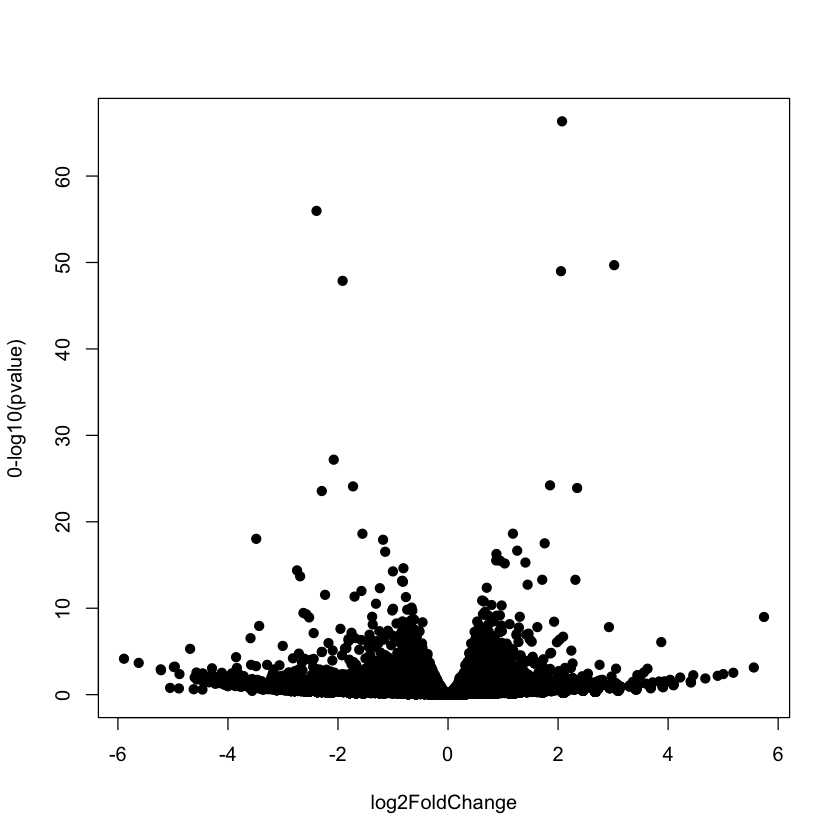

In [25]:
plot(res$log2FoldChange, 0-log10(res$pvalue), xlab='log2FoldChange', ylab='0-log10(pvalue)', pch=19)

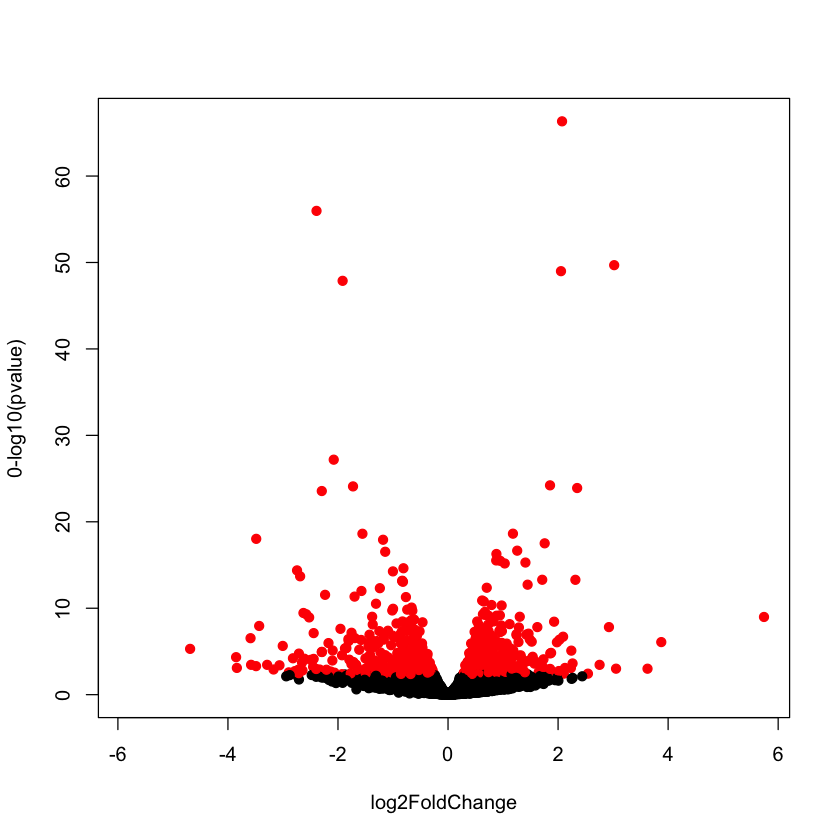

In [9]:
#highlight significant genes
color = ifelse(res$padj<0.05, 'red', 'black')
plot(res$log2FoldChange, 0-log10(res$pvalue), xlab='log2FoldChange', ylab='0-log10(pvalue)', pch=19,
    col = color)

# Heatmap for top differentially expressed genes

In [10]:
library(pheatmap)

Fetching normalized counts from DESeq object

,SRR3051648,SRR3051647,SRR3051646,SRR3051643,SRR3051645,SRR3051644
Afp,1146.46011,1180.89880,1146.624784,269.06899,300.03472,256.61295
Gm26917,175.06467,134.92902,158.415266,758.37977,781.46579,915.13955
Tet1,344.79201,457.67924,474.168144,55.06045,51.58190,50.98270
Gm43449,888.13297,813.89186,938.637393,186.99775,240.71554,207.32967
Gm4737,341.58960,294.68498,253.248895,1080.43145,1117.60784,1158.15710
Dppa4,136.63584,79.87798,109.920797,484.11640,410.93581,483.48598
Trh,323.44266,330.30624,358.859072,89.34337,86.82953,103.66483
Cap1,130.23104,128.45243,120.697346,464.37775,415.23430,377.27201
Fam111a,212.42603,229.91905,265.103098,56.09933,42.12522,41.63588
Tnfrsf1a,46.96857,48.57445,60.348673,294.00202,225.24097,246.41641


genotype
<chr>
wt
wt
wt
ko
ko
ko


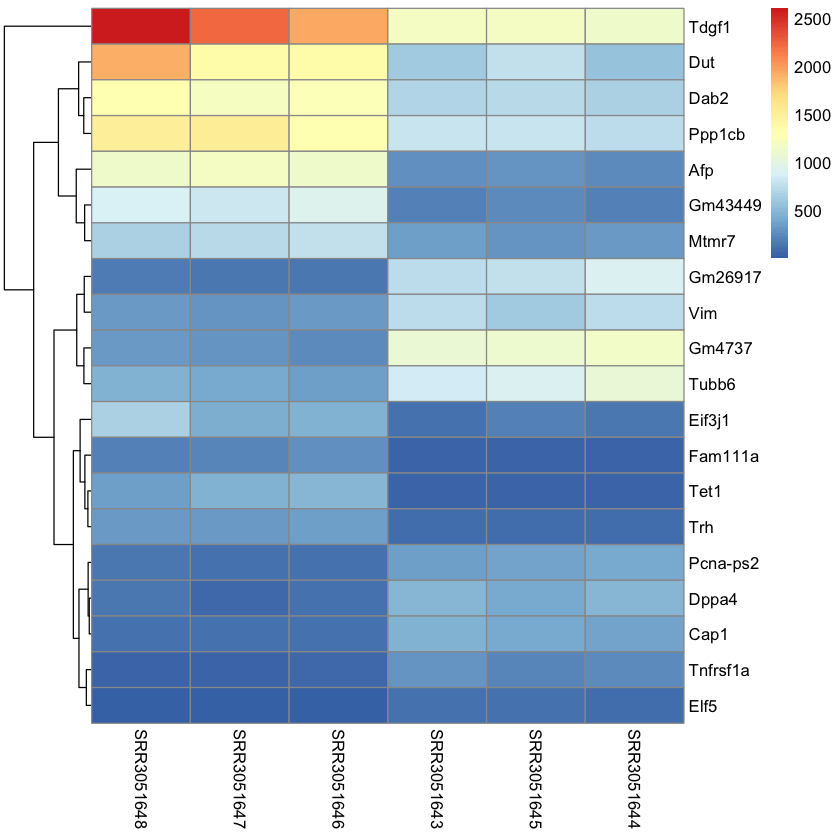

In [11]:
library("pheatmap")

#Fetching normalized counts from DESeq object
Mnorm = counts(DE, normalized=TRUE)
#Reorder columns of matrix: wt first, then ko
column_order = rev(order(metadata$treatment))

#top20 differentially expressed genes (ranked by p-value)
topgenes <- order(res$pvalue, decreasing=F)[1:20]

Mnorm[topgenes, column_order]


annotation <- data.frame(genotype = metadata$treatment[column_order])
annotation
pheatmap(Mnorm[topgenes,column_order], cluster_rows=T, show_rownames=T,
         cluster_cols=F)#, annotation_col=annotation)

In [12]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS  10.16

Matrix products: default
BLAS/LAPACK: /Users/artem/anaconda3/envs/bulkRNA/lib/libopenblasp-r0.3.12.dylib

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] pheatmap_1.0.12             DESeq2_1.30.0              
 [3] SummarizedExperiment_1.20.0 Biobase_2.50.0             
 [5] MatrixGenerics_1.2.0        matrixStats_0.57.0         
 [7] GenomicRanges_1.42.0        GenomeInfoDb_1.26.0        
 [9] IRanges_2.24.0              S4Vectors_0.28.0           
[11] BiocGenerics_0.36.0        

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.5             locfit_1.5-9.4         lattice_0.20-41       
 [4] digest_0.6.27          IRdisplay_0.7.0        R6_2.5.0              
 [7] repr_1.1.0             RSQLite_2.